In [27]:
import db
import db_twetext
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import re
import pickle

# Getting info from SQLite tweets

In [2]:
tweets=list(db.orm.select(t for t in db.Tweet))

In [3]:
text_L=list(i.text for i in tweets)
sentiment_L =list(i.sentiment for i in tweets)

In [4]:
df = pd.DataFrame({
    "Text": text_L,
    "Sentiment": sentiment_L
})

In [5]:
np.random.seed(1337)
msk = np.random.rand(len(df)) < 0.8
print(len(df[msk]),
len(df[~msk]))

40460 10309


# Splitting in train and test

In [6]:
df_train = df[msk]
df_test = df[~msk]

# No Tunning Study

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(binary=True)
cv.fit(df_train['Text'])
X = cv.transform(df_train['Text'])
X_test = cv.transform(df_test['Text'])

In [8]:
X_train, X_val, y_train, y_val = train_test_split(
    X, df_train['Sentiment'], train_size = 0.75
)

/home/nikolas/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [9]:
C1=[]
score_v=[]
print("\t"*3+"VALIDATION:\n")
for c in (10**exp for exp in range(-10, 10)):
#for c in np.linspace(0.0000000000001,1,20):
    lr=LogisticRegression(C=c)
    lr.fit(X_train,y_train)
    print ("C={:.5f}:\t\t{:.5f}".format
           (c,accuracy_score(y_val, lr.predict(X_val))))
    C1.append(c)
    score_v.append(accuracy_score(y_val, lr.predict(X_val)))

			VALIDATION:

C=0.00000:		0.58438
C=0.00000:		0.58428
C=0.00000:		0.58438


/home/nikolas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C=0.00000:		0.58428
C=0.00000:		0.58468
C=0.00001:		0.59090
C=0.00010:		0.62847
C=0.00100:		0.67217
C=0.01000:		0.72447
C=0.10000:		0.76174
C=1.00000:		0.76589
C=10.00000:		0.75353
C=100.00000:		0.73020
C=1000.00000:		0.69619
C=10000.00000:		0.67088
C=100000.00000:		0.66288
C=1000000.00000:		0.65645
C=10000000.00000:		0.65714
C=100000000.00000:		0.65418
C=1000000000.00000:		0.65665


In [11]:
len(C1)

20

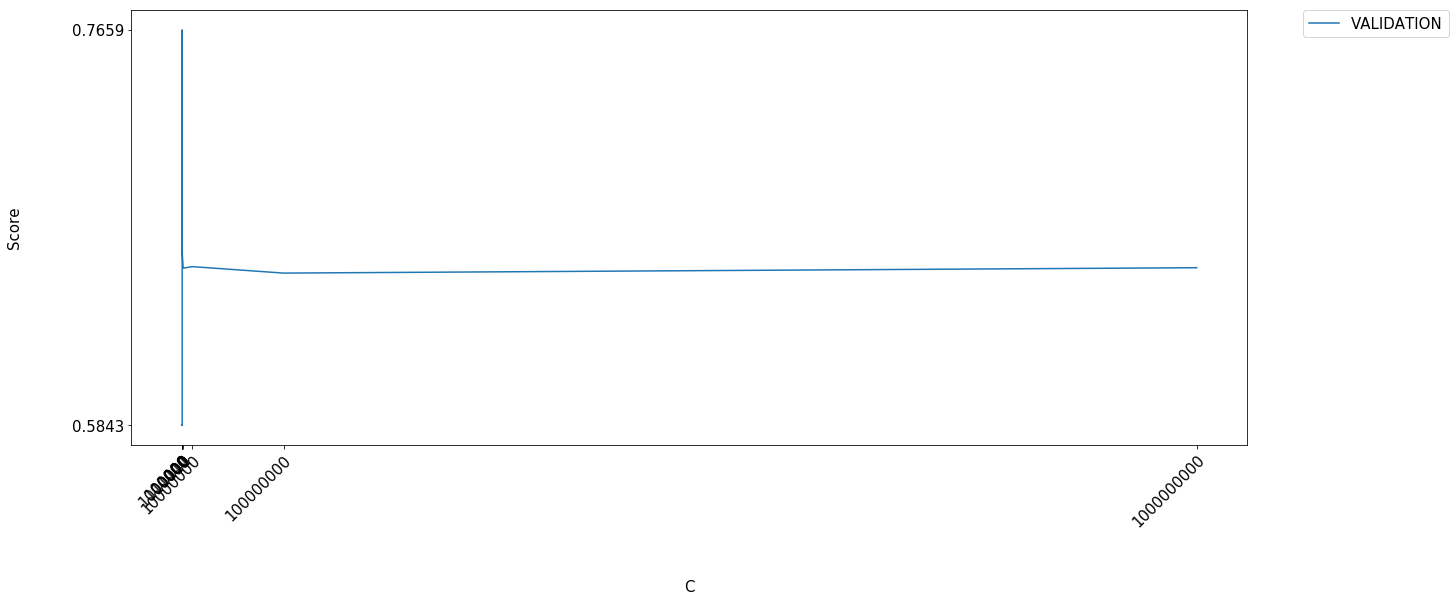

In [10]:
fsize=15
fig,ax=plt.subplots(figsize=(20,8))
plt.plot(C1,score_v, label='VALIDATION')
plt.ticklabel_format(style='sci', axis='x', scilimits=(10**(-10),10**(10)))
plt.xlabel('C', fontsize=fsize, labelpad=50)
plt.ylabel('Score', fontsize=fsize, labelpad=50)
plt.xticks(C1,fontsize=fsize)
plt.yticks(list([min(score_v),max(score_v)]), fontsize=fsize)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0. ,fontsize=fsize)
plt.show()

As the difference is not so big between the lasts few "C" values, i have cut a few them apart for better visualization

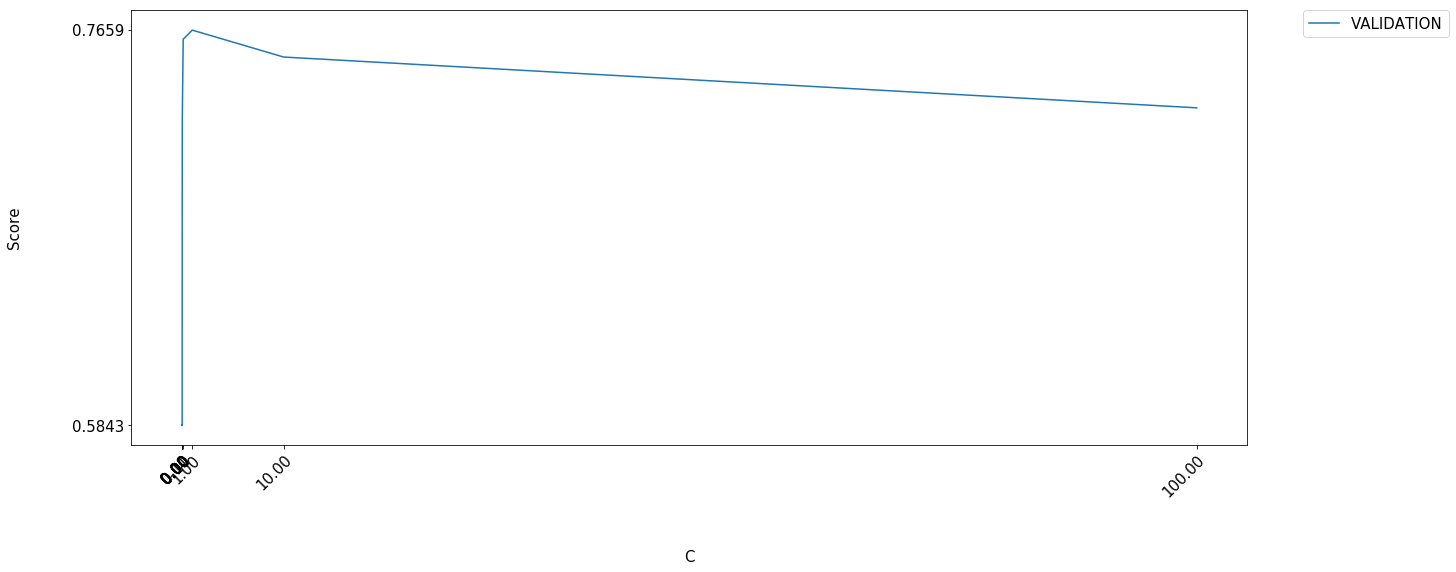

In [15]:
fsize=15
fig,ax=plt.subplots(figsize=(20,8))
plt.plot(C1[:13],score_v[:13], label='VALIDATION')
plt.ticklabel_format(style='sci', axis='x', scilimits=(10**(-10),10**(10)))
plt.xlabel('C', fontsize=fsize, labelpad=50)
plt.ylabel('Score', fontsize=fsize, labelpad=50)
plt.xticks(C1[:13],fontsize=fsize)
plt.yticks(list([min(score_v),max(score_v)]), fontsize=fsize)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0. ,fontsize=fsize)
plt.show()

Cutting a few more just for visualization

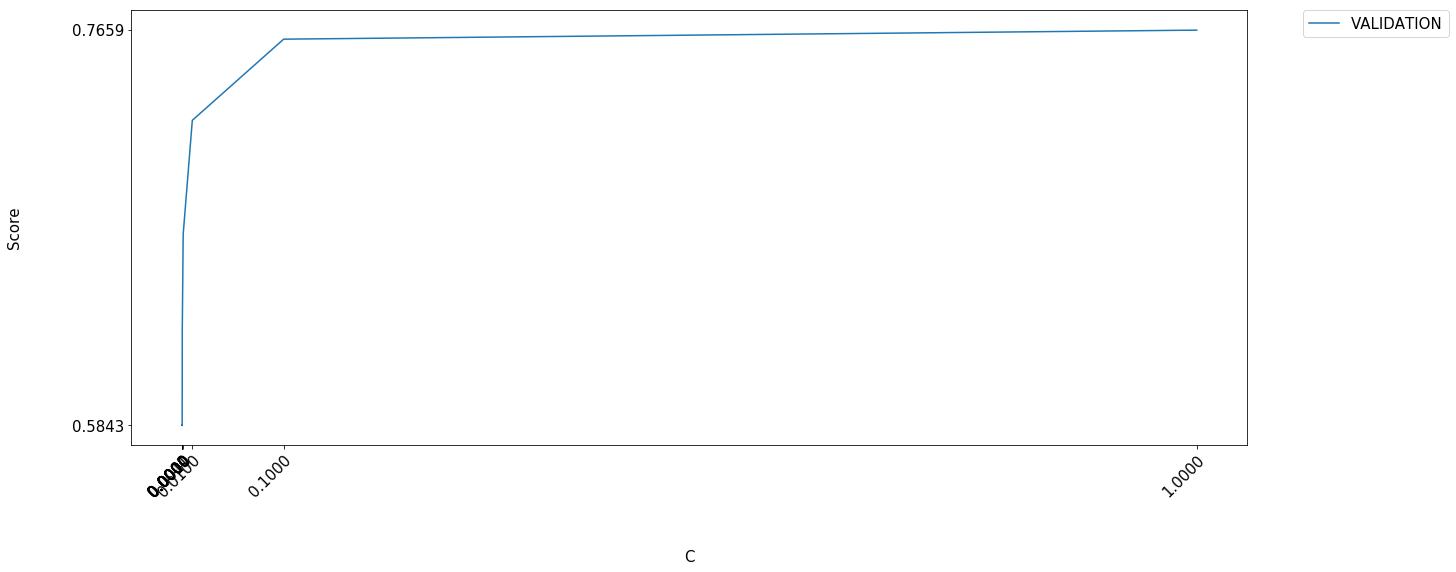

In [16]:
fsize=15
fig,ax=plt.subplots(figsize=(20,8))
plt.plot(C1[:11],score_v[:11], label='VALIDATION')
plt.ticklabel_format(style='sci', axis='x', scilimits=(10**(-10),10**(10)))
plt.xlabel('C', fontsize=fsize, labelpad=50)
plt.ylabel('Score', fontsize=fsize, labelpad=50)
plt.xticks(C1[:11],fontsize=fsize)
plt.yticks(list([min(score_v),max(score_v)]), fontsize=fsize)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0. ,fontsize=fsize)
plt.show()

And this is how the score is with values below 1

In [17]:
C1=[]
score_v=[]
print("\t"*3+"VALIDATION:\n")
for c in np.linspace(0.0000000000001,1,20):
    lr=LogisticRegression(C=c)
    lr.fit(X_train,y_train)
    print ("C={:.5f}:\t\t{:.5f}".format
           (c,accuracy_score(y_val, lr.predict(X_val))))
    C1.append(c)
    score_v.append(accuracy_score(y_val, lr.predict(X_val)))

			VALIDATION:

C=0.00000:		0.58428
C=0.05263:		0.75264
C=0.10526:		0.76204
C=0.15789:		0.76490
C=0.21053:		0.76599
C=0.26316:		0.76688
C=0.31579:		0.76738
C=0.36842:		0.76708
C=0.42105:		0.76817
C=0.47368:		0.76846
C=0.52632:		0.76807
C=0.57895:		0.76826
C=0.63158:		0.76767
C=0.68421:		0.76728
C=0.73684:		0.76698
C=0.78947:		0.76747
C=0.84211:		0.76698
C=0.89474:		0.76708
C=0.94737:		0.76658
C=1.00000:		0.76589


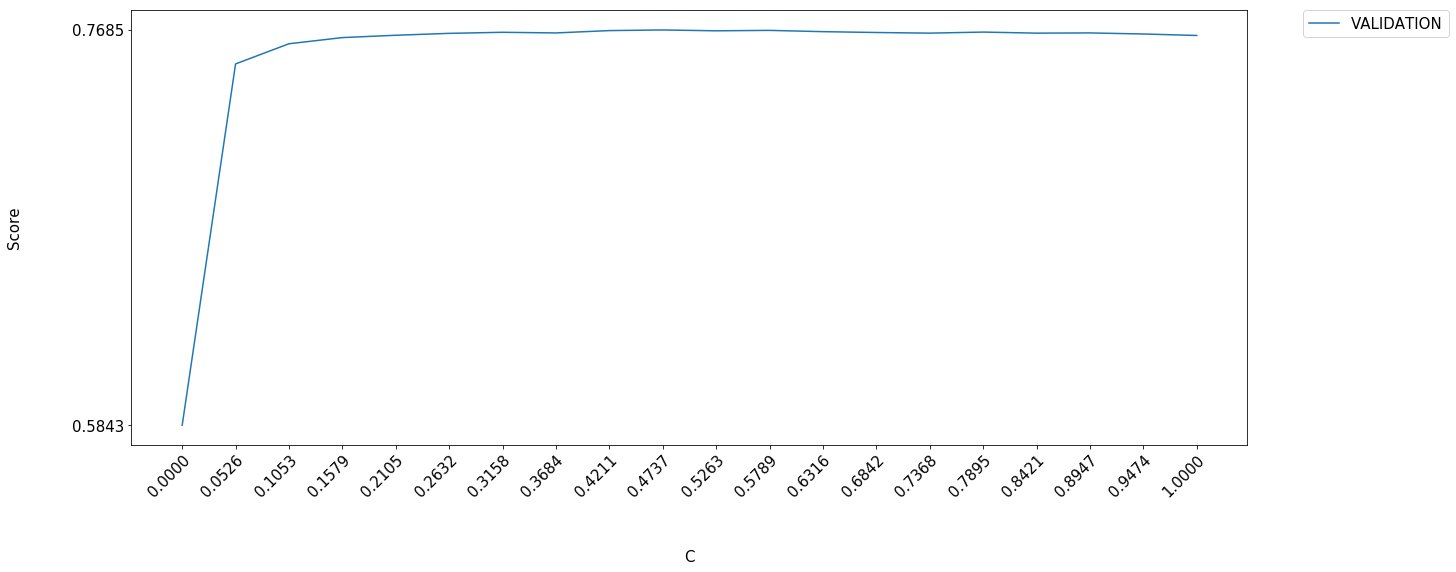

In [18]:
fsize=15
fig,ax=plt.subplots(figsize=(20,8))
plt.plot(C1,score_v, label='VALIDATION')
plt.ticklabel_format(style='sci', axis='x', scilimits=(10**(-10),10**(10)))
plt.xlabel('C', fontsize=fsize, labelpad=50)
plt.ylabel('Score', fontsize=fsize, labelpad=50)
plt.xticks(C1,fontsize=fsize)
plt.yticks(list([min(score_v),max(score_v)]), fontsize=fsize)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0. ,fontsize=fsize)
plt.show()

The max value is:<br>
C=0.47368 -----> 0.76846<br>
Let's test it

In [24]:
final_model1 = LogisticRegression(C=C1[score_v.index(max(score_v))])
final_model1.fit(X_train, y_train)
print ("Final F1 Score: %s" 
       % f1_score(df_test['Sentiment'], final_model1.predict(X_test)))
print("Error: %s" % (1- f1_score(df_test['Sentiment'], final_model1.predict(X_test))))

/home/nikolas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Final F1 Score: 0.7767792954708843
Error: 0.2232207045291157


Let's try it in a few new text collected in real time from twitter

In [28]:
a=list(db_twetext.orm.select(t for t in db_twetext.Twetext))

In [29]:
b=list(i.twetext for i in a)

In [30]:
df = pd.DataFrame({
                    "Text":b
                  })

In [31]:
df.head()

,Text
0,"Aconteceu um negócio bem legal, de novo :P"
1,por incrivel q pareça...... eu gostei da music...
2,a musica da decada aqui https://t.co/hK4dnpUSm1
3,Madrugada + musica= eu triste
4,@Luan_xav1 @ayjoriedixx Musica braba


In [38]:
df[df["Sentiments"].isnull()]

,Text,Sentiments


In [32]:
final_model1.predict(cv.transform(df["Text"]))

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1])

In [35]:
df['Sentiments'] = final_model1.predict(cv.transform(df["Text"]))

So, 3 people did the same work as this Model, how well our Model did compared to them

In [36]:
df_nik = pd.read_excel("sentiments - Musica.xlsx")
df_will = pd.read_excel("sentiments_WILL - Musica.xlsx")
df_ewerton = pd.read_excel("sentiments_EWERTON - Musica.xlsx")
df_nik.drop(["Unnamed: 0"],axis=1,inplace=True)
df_will.drop(["Unnamed: 0"],axis=1,inplace=True)
df_ewerton.drop(["Unnamed: 0"],axis=1,inplace=True)

Checking if there is any NaN value or skipped manual input from human side

In [39]:
df_nik[df_nik["Sentiments"].isnull()]

,Text,Sentiments


In [40]:
df_will[df_will["Sentiments"].isnull()]

,Text,Sentiments


In [41]:
df_ewerton[df_ewerton["Sentiments"].isnull()]

,Text,Sentiments


In [42]:
df_sentiments_table=pd.DataFrame({
    "Nik":df_nik["Sentiments"],
    "Will":df_will["Sentiments"],
    "Ewerton":df_ewerton["Sentiments"],
})

In [43]:
df_sentiments_table

,Nik,Will,Ewerton
0,1,1,1
1,1,1,1
2,1,1,1
3,0,0,0
4,1,1,0
5,1,1,1
6,1,1,1
7,1,1,1
8,0,0,0
9,0,0,0


In [44]:
temp_list=[]
for i, row in df_sentiments_table.iterrows():
    c0=0
    c1=0
    if row['Nik'] == 1:
        c1+=1
    else:
        c0+=1
    if row['Will'] == 1:
        c1+=1
    else:
        c0+=1
    if row['Ewerton'] == 1:
        c1+=1
    else:
        c0+=1
    temp_list.append(0 if c0>c1 else 1)
df_sentiments_table["TT"] = temp_list


In [45]:
df_sentiments_table

,Nik,Will,Ewerton,TT
0,1,1,1,1
1,1,1,1,1
2,1,1,1,1
3,0,0,0,0
4,1,1,0,1
5,1,1,1,1
6,1,1,1,1
7,1,1,1,1
8,0,0,0,0
9,0,0,0,0


In [47]:
f1_score(y_true=df_sentiments_table["TT"],y_pred=df["Sentiments"],average="macro")

0.5562342795544377

In [48]:
f1_score(y_true=df_nik["Sentiments"],y_pred=df["Sentiments"],average="macro")

0.5924637681159419

In [49]:
f1_score(y_true=df_will["Sentiments"],y_pred=df["Sentiments"],average="macro")

0.5758928571428571

In [50]:
f1_score(y_true=df_ewerton["Sentiments"],y_pred=df["Sentiments"],average="macro")

0.44664492078285184

# With Tunning Study

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
grid={"C":np.linspace(0.0000000000001,1,20)}
lr=LogisticRegression()
lr_cv=GridSearchCV(lr,grid,cv=3)
lr_cv.fit(X_train,y_train)

print("tuned hyperparameters :(best parameters) ",lr_cv.best_params_)
print("score :",lr_cv.best_score_)
print()
print("Best parameters set found on development set:")
print()
print(lr_cv.best_params_)
print()
print("Grid scores on development set:")
print()
means = lr_cv.cv_results_['mean_test_score']
stds = lr_cv.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, lr_cv.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()
y_true, y_pred = y_val, lr_cv.predict(X_val)
print(classification_report(y_true, y_pred))
print()


/home/nikolas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


tuned hyperparameters :(best parameters)  {'C': 0.31578947368427895}
score : 0.7589718240237271

Best parameters set found on development set:

{'C': 0.31578947368427895}

Grid scores on development set:

0.582 (+/-0.004) for {'C': 1e-13}
0.744 (+/-0.012) for {'C': 0.05263157894746316}
0.750 (+/-0.011) for {'C': 0.10526315789482632}
0.753 (+/-0.008) for {'C': 0.1578947368421895}
0.757 (+/-0.008) for {'C': 0.21052631578955264}
0.758 (+/-0.007) for {'C': 0.26315789473691575}
0.759 (+/-0.008) for {'C': 0.31578947368427895}
0.758 (+/-0.006) for {'C': 0.3684210526316421}
0.758 (+/-0.007) for {'C': 0.42105263157900524}
0.758 (+/-0.006) for {'C': 0.4736842105263684}
0.758 (+/-0.006) for {'C': 0.5263157894737316}
0.758 (+/-0.007) for {'C': 0.5789473684210947}
0.758 (+/-0.006) for {'C': 0.631578947368458}
0.758 (+/-0.006) for {'C': 0.6842105263158211}
0.757 (+/-0.006) for {'C': 0.7368421052631843}
0.757 (+/-0.005) for {'C': 0.7894736842105474}
0.757 (+/-0.006) for {'C': 0.8421052631579106}
0.75

In [ ]:
lr_cv_best_parameters=lr_cv.best_estimator_.get_params()['C']
final_model2 = LogisticRegression(C=lr_cv_best_parameters)
final_model2.fit(X_train, y_train)
print("BEST ESTIMATOR WITHOUT PIPELINE")
print ("Final F1_Score: %s" 
       % f1_score(df_test['Sentiment'], final_model2.predict(X_test)))
print("Error: %s" % (1- f1_score(df_test['Sentiment'], final_model2.predict(X_test))))

<b>GridSearch + pipeline</b>

In [53]:
from pprint import pprint
from time import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
import nltk.corpus

stopwords_PT = nltk.corpus.stopwords.words('portuguese')

pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('lr',LogisticRegression()),
])

# uncommenting more parameters will give better exploring power but will
# increase processing time in a combinatorial way
parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__min_df': (0.01, 0.05, 0.1),
    'vect__ngram_range': ((1, 1), (1, 2),(2, 2)),
    'vect__binary':(False,True),
    'vect__stop_words': [None,(stopwords_PT)],
    'lr__C': np.linspace(0.0000000000001,1,20),
}

grid_search=GridSearchCV(pipeline,parameters,cv=3,scoring="f1_macro",verbose = 1, n_jobs =-1)
print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline.steps])
print("parameters:")
pprint(parameters)
t0 = time()
grid_search.fit(df_train['Text'],df_train['Sentiment'])
print("done in %0.3fs" % (time() - t0))
print()

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))


Performing grid search...
pipeline: ['vect', 'lr']
parameters:
{'lr__C': array([1.00000000e-13, 5.26315789e-02, 1.05263158e-01, 1.57894737e-01,
       2.10526316e-01, 2.63157895e-01, 3.15789474e-01, 3.68421053e-01,
       4.21052632e-01, 4.73684211e-01, 5.26315789e-01, 5.78947368e-01,
       6.31578947e-01, 6.84210526e-01, 7.36842105e-01, 7.89473684e-01,
       8.42105263e-01, 8.94736842e-01, 9.47368421e-01, 1.00000000e+00]),
 'vect__binary': (False, True),
 'vect__max_df': (0.5, 0.75, 1.0),
 'vect__min_df': (0.01, 0.05, 0.1),
 'vect__ngram_range': ((1, 1), (1, 2), (2, 2)),
 'vect__stop_words': [None,
                      ['de',
                       'a',
                       'o',
                       'que',
                       'e',
                       'do',
                       'da',
                       'em',
                       'um',
                       'para',
                       'com',
                       'não',
                       'uma',
           

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 27.1min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 34.9min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 44.4min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 54.7min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 66.0min
[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed: 70.6min finished


done in 4239.798s

Best score: 0.678
Best parameters set:
	lr__C: 0.8947368421052737
	vect__binary: False
	vect__max_df: 0.5
	vect__min_df: 0.01
	vect__ngram_range: (1, 1)
	vect__stop_words: None


/home/nikolas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [54]:
print("Best parameters set found on development set:")
print()
print(grid_search.best_params_)
print()
print("Grid scores on development set:")
print()
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

Best parameters set found on development set:

{'lr__C': 0.8947368421052737, 'vect__binary': False, 'vect__max_df': 0.5, 'vect__min_df': 0.01, 'vect__ngram_range': (1, 1), 'vect__stop_words': None}

Grid scores on development set:

0.491 (+/-0.013) for {'lr__C': 1e-13, 'vect__binary': False, 'vect__max_df': 0.5, 'vect__min_df': 0.01, 'vect__ngram_range': (1, 1), 'vect__stop_words': None}
0.354 (+/-0.000) for {'lr__C': 1e-13, 'vect__binary': False, 'vect__max_df': 0.5, 'vect__min_df': 0.01, 'vect__ngram_range': (1, 1), 'vect__stop_words': ['de', 'a', 'o', 'que', 'e', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas'

0.547 (+/-0.010) for {'lr__C': 1.0, 'vect__binary': True, 'vect__max_df': 1.0, 'vect__min_df': 0.1, 'vect__ngram_range': (1, 1), 'vect__stop_words': None}
0.499 (+/-0.021) for {'lr__C': 1.0, 'vect__binary': True, 'vect__max_df': 1.0, 'vect__min_df': 0.1, 'vect__ngram_range': (1, 1), 'vect__stop_words': ['de', 'a', 'o', 'que', 'e', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas',

In [58]:
from sklearn.feature_extraction.text import CountVectorizer

cv_ngram = CountVectorizer(binary=False,max_df=0.5,min_df=0.01,ngram_range=(1,1),stop_words=None)
cv_ngram.fit(df_train['Text'])
X = cv_ngram.transform(df_train['Text'])
X_test = cv_ngram.transform(df_test['Text'])

In [59]:
final_model3 = LogisticRegression(C=best_parameters['lr__C'])
final_model3.fit(X, df_train['Sentiment'])
print("BEST ESTIMATOR WITH PIPELINE")
print ("Final F1_Score: %s" 
       % f1_score(df_test['Sentiment'], final_model3.predict(X_test)))
print("Error: %s" % (1- f1_score(df_test['Sentiment'], final_model3.predict(X_test))))

BEST ESTIMATOR WITH PIPELINE
Final F1_Score: 0.7133276010318143
Error: 0.28667239896818575


/home/nikolas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Let's try it in same DF as before

In [60]:
a=list(db_twetext.orm.select(t for t in db_twetext.Twetext))

In [61]:
b=list(i.twetext for i in a)

In [62]:
df = pd.DataFrame({
                    "Text":b
                  })

In [63]:
df.head()

,Text
0,"Aconteceu um negócio bem legal, de novo :P"
1,por incrivel q pareça...... eu gostei da music...
2,a musica da decada aqui https://t.co/hK4dnpUSm1
3,Madrugada + musica= eu triste
4,@Luan_xav1 @ayjoriedixx Musica braba


In [66]:
final_model3.predict(cv_ngram.transform(df["Text"]))

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0])

In [67]:
df['Sentiments'] = final_model3.predict(cv_ngram.transform(df["Text"]))

So, 3 people did the same work as this Model, how well our Model did compared to them

In [68]:
df_nik = pd.read_excel("sentiments - Musica.xlsx")
df_will = pd.read_excel("sentiments_WILL - Musica.xlsx")
df_ewerton = pd.read_excel("sentiments_EWERTON - Musica.xlsx")
df_nik.drop(["Unnamed: 0"],axis=1,inplace=True)
df_will.drop(["Unnamed: 0"],axis=1,inplace=True)
df_ewerton.drop(["Unnamed: 0"],axis=1,inplace=True)

Checking if there is any NaN value or skipped manual input from human side

In [69]:
df_nik[df_nik["Sentiments"].isnull()]

,Text,Sentiments


In [70]:
df_will[df_will["Sentiments"].isnull()]

,Text,Sentiments


In [71]:
df_ewerton[df_ewerton["Sentiments"].isnull()]

,Text,Sentiments


In [72]:
df_sentiments_table=pd.DataFrame({
    "Nik":df_nik["Sentiments"],
    "Will":df_will["Sentiments"],
    "Ewerton":df_ewerton["Sentiments"],
})

In [73]:
df_sentiments_table

,Nik,Will,Ewerton
0,1,1,1
1,1,1,1
2,1,1,1
3,0,0,0
4,1,1,0
5,1,1,1
6,1,1,1
7,1,1,1
8,0,0,0
9,0,0,0


In [74]:
temp_list=[]
for i, row in df_sentiments_table.iterrows():
    c0=0
    c1=0
    if row['Nik'] == 1:
        c1+=1
    else:
        c0+=1
    if row['Will'] == 1:
        c1+=1
    else:
        c0+=1
    if row['Ewerton'] == 1:
        c1+=1
    else:
        c0+=1
    temp_list.append(0 if c0>c1 else 1)
df_sentiments_table["TT"] = temp_list


In [75]:
df_sentiments_table

,Nik,Will,Ewerton,TT
0,1,1,1,1
1,1,1,1,1
2,1,1,1,1
3,0,0,0,0
4,1,1,0,1
5,1,1,1,1
6,1,1,1,1
7,1,1,1,1
8,0,0,0,0
9,0,0,0,0


In [76]:
f1_score(y_true=df_sentiments_table["TT"],y_pred=df["Sentiments"],average="macro")

0.5439644069781056

In [77]:
f1_score(y_true=df_nik["Sentiments"],y_pred=df["Sentiments"],average="macro")

0.5774888812863497

In [78]:
f1_score(y_true=df_will["Sentiments"],y_pred=df["Sentiments"],average="macro")

0.5648505303760849

In [79]:
f1_score(y_true=df_ewerton["Sentiments"],y_pred=df["Sentiments"],average="macro")

0.49977106227106227

# Dumping model into pickles

In [24]:
pickle.dump(final_model2, open("./our_model.pkl", "wb"))
pickle.dump(cv_ngram, open("./our_cv.pkl", "wb"))